#Analyzing Public Perception of COVID Vaccines

AT1 Part B : NLP for Data Analysis Markdown Report with Python Code


---
## Intorduction

In 2019, the whole world changed when the COVID-19 pandemic started that affected the lives of millions of people worldwide. Despite several efforts to control the spread of the virus, it continued to wreak havoc, highlighting the pressing need to discover a cure. The desperate need for the vaccine sparked a sense of urgency in governments, research institutions, and pharmaceutical companies to find the cure.

However, despite the pressing need for the vaccine, people remained skeptical, and vaccine hesitancy remains a concern. 

The aim of this text Analysis study is to analyze the public's perception of COVID-19 Vaccines.

## Research Question
Are people's perception towards COVID-19 vaccines positive, negative or neutral.

## Data
Two different datasets are going to be used for this project:

* COVID-19 Vaccine Intent Expressions dataset

  Dataset containig a list of 181 common questions as well as expressions written by annotators expressing said questions in their words

* IBM_Debater_(R)_trust_data

    Dataset containing user side inputs ragrding the vaccine annnotated for trust. It consists of a text column with the user side input and a label column with the trust label index as follows

    > 0 - Low Institutional Trust

    > 1- Low Agent Trust

    > 2 -  Neutral

    > 3 - High Trust

## Hypothesis

Vaccine hesitancy is still a dominating problem in today's world with people still not trusting the efficacy and necessity of the vaccine


## Load and Prepare Datasets

First, we are going to import the required Libraries along with the needed modules using the "import" command.



In [1]:
#Enable plots to be displayed in the notebook
%matplotlib inline

!pip install seaborn

#For data manipulation inport pandas and numpy
import pandas as pd
import numpy as np

#matplotlib and seaborn for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for string manipulation import string
import string

#For text analysis import nltk with several packages
import nltk
from collections import Counter
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import *
from nltk.collocations import BigramAssocMeasures
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#for generating a word cloud inport WordCloud
from wordcloud import WordCloud

#Downloading some additional packages
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

**1. Loading the Datasets**

In order to be able to get the CSV files without any additonal format or processing, I uploaded them to my GitHub on a public repository and extracted the raw file by clicking on **raw** at the top right of the file.

Each row of data is represented as a line of text, with each field separated by a comma. The first row of the CSV file contains the column headers, which define the names of the fields.


In [2]:
#links to the datasets
Intent_Expression_Link = 'https://raw.githubusercontent.com/shalimarchalhoub/TextAnalysis/main/IBM_Debater_(R)_Intent_expressions/train_23.csv'
Trust_Data_Link ='https://raw.githubusercontent.com/shalimarchalhoub/TextAnalysis/main/IBM_Debater_(R)_trust_data/data/train.csv'


 **2. Reading the Data from the CSV Files**

Since I have links to the raw files of my datasets, I used the read_csv( ) function from Pandas to create my DataFrames


 

In [3]:
#Reading the Intent Expression CSV file
expressions_df = pd.read_csv(Intent_Expression_Link)
trust_df = pd.read_csv(Trust_Data_Link)

## Preliminary Data Exploration

Since we have a large dataset, we like to explore it and get some insights on it to get a better understanding of what the dataset looks like

Some commands we can use are:
* head( ) : To see the first 5 lines of the dataset
* info( ) : To see general information about the dataset including Missing Values
* sample( ) : To get a random sample of the data to better understand it
* decsribe( ) : To see descriptive analysis of the Dataset including max, mean, mean and others 

For these datasets, we do not have numeral data which we need descriptive analysis for and thus, no need to use the function describe( )


### Intent Expressions Dataset


Since we have 2 datasets, we will explore them separately starting with the Intent Expressions Dataset 

In [4]:
#Check the info of the Intent Expressions Dataset
expressions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   5169 non-null   object
 1   label      5169 non-null   object
 2   label_idx  5169 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


From the above information we can see that there is no missing information from the dataset and thus, in the preprocessing stage, there is no need to remove missing values

In [5]:
#Check the first 10 Lines of the Dataset
expressions_df.head(10)

,sentence,label,label_idx
0,Do booster shots have side effects worsen than...,Are booster shot side effects worse than those...,175
1,the vaccine has side effects?,Are booster shot side effects worse than those...,175
2,booster vaccine leaves worse side effects than...,Are booster shot side effects worse than those...,175
3,are reinforcements safe?,Are booster shot side effects worse than those...,175
4,because the second dose of the covid-19 vaccin...,Are booster shot side effects worse than those...,175
5,really the side effects are worse after the fi...,Are booster shot side effects worse than those...,175
6,Will the second injection have fewer effects t...,Are booster shot side effects worse than those...,175
7,because the second dose of the vaccine causes ...,Are booster shot side effects worse than those...,175
8,Are the side effects of the booster worse than...,Are booster shot side effects worse than those...,175
9,Does the booster have stronger side effects?,Are booster shot side effects worse than those...,175


In [6]:
#Similar to above, but provides a random sample of rows rather than the first few. 
expressions_df.sample(10)

,sentence,label,label_idx
3212,"I am halal, is the vaccine usable by me?",Is the vaccine halal?,63
3123,Why should anybody thnk that the booster is co...,Is the booster shot dangerous?,176
1555,"I want to stay safe until vaccinated, what do ...",How can I stay safe until I'm vaccinated?,52
1154,Do vaccines work against these variants?,Do vaccines work against the mutated strains o...,25
4106,Is the vaccine dangerous for plasma patients?,What if I've been treated with convalescent pl...,74
4234,How does the vaccine using mRNA differ from a ...,What is mRNA?,76
1359,Is one of the ingredients in the vaccine the C...,Does the vaccine contain live COVID virus?,49
2788,Why did my COVID test come back as negative ev...,I'm still experiencing COVID symptoms even aft...,89
3176,Is there a difference between FDA approval and...,Is the vaccine FDA approved?,158
145,I'm young fit and healthy so it seems to me th...,COVID vaccines can be worse than the disease i...,18


### Trust Dataset
Next, we will be exploring the trust data dataset

In [7]:
#Check the info of the Trust Dataset
trust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1815 non-null   object
 1   label   1815 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 28.5+ KB


From the above information we can see that there is no missing information from the dataset and thus, in the preprocessing stage, there is no need to remove missing values

In [8]:
#Check the first 10 Lines of the Trust Dataset
trust_df.head(10)

,text,label
0,If symptomatic patient got the vaccine will he...,0
1,"Has anyone died from getting the Pfizer, Moder...",0
2,Why should I trust a pharmaceutical company wh...,0
3,What are antisense RNA's? Could they or dsRNA...,0
4,The vaccines aren't FDA approved.,0
5,Do mRNA vaccines damage reproductive system,0
6,how many people have several issues after the ...,0
7,How many people got sick because of the vaccin...,0
8,How does the vaccine affect fertility,0
9,"Since it is a man made product, what are the l...",0


In [9]:
#Get a random sample of 10 rows from the Trust Dataset
trust_df.sample(10)

,text,label
487,I am diabetic,2
1026,when will we get to herd immunity,2
1125,I am young and healthy. Why do I need to get ...,2
1482,Does the vaccine prevent the spread of covid?,2
1553,Why are they calling gene therapy a vaccine? ...,2
213,can i get sick from the vaccine,0
402,I am concerned of side effects,0
498,corona symptoms,2
1509,There's more deaths than at any other time ove...,2
104,is the vaccine made with poop?,0


## Visual Explorations 
It is very important to visualy explore our datasets since graphs can tell us a lot of information and visuals reveal a lor of hidden information about the data

The first thing I'm going to do is a histogram for the Intent Expressions Dataset to show the distribution of answers in regards to each question asked which will lead me to see the questions that were answered most and those answered least.

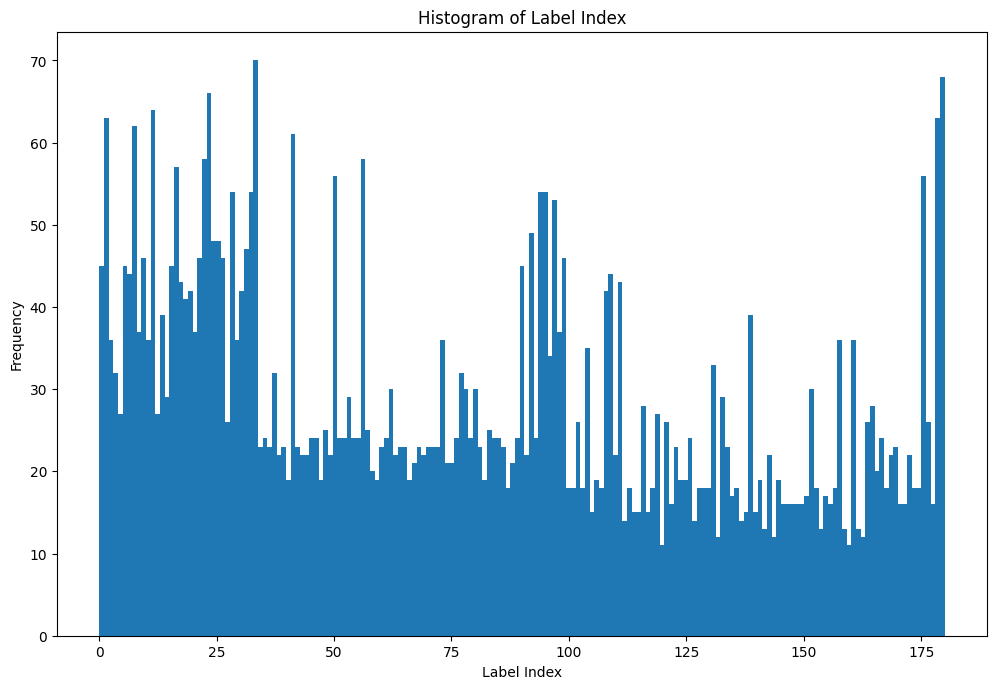

In [10]:
#Using Matplotlib to do a Histogram

# Creating a new figure and axis object with a specific size and resolution
fig, ax = plt.subplots(figsize=(12, 8), dpi=100)

#Plot the hisogram with 181 bins which is the number of questions there is
ax.hist(expressions_df['label_idx'], bins=181,linewidth=0.8)

# Add x and y labels
ax.set_xlabel('Label Index')
ax.set_ylabel('Frequency')

# Add a title
ax.set_title('Histogram of Label Index')

plt.show()

By examining the histogram, it is apparent that certain questions received significantly fewer answers than others, while some questions received two or three times more answers than the rest. This observation suggests that the distribution of answers is not uniform.


____________________________



Next, we will move on to visually explore the trust Dataset by doing a histogram to show how trusting people were when it came to the COVID-19 Vaccine.
The dataset has a column titled **trust label** which diplays the level of trust that people have when it comes to the vaccine following the below parameters.

  0 ->  Low Institutional Trust

  1 ->  Low Agent Trust

  2 ->  Neutral
  
  3 -> High Trust




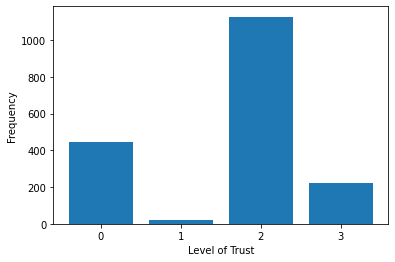

In [11]:
#Using matplotlib to do a Histogram

#First we count the number of occurence of each level
counts = trust_df['label'].value_counts()

# Create a bar plot of the frequency counts
plt.bar(counts.index, counts.values)

# Add labels to the x-axis and y-axis
plt.xlabel("Level of Trust")
plt.ylabel("Frequency")

# Set the x-axis ticks to only show the numbers 0, 1, 2, and 3
plt.xticks([0, 1, 2, 3])

# Show the plot
plt.show()

The above plot indicates that most people hold a neutral stance toward the vaccine, while less than a quarter express a high level of trust in it. Moreover, those who exhibit a low level of trust in the vaccine tend to have greater distrust in institutions rather than the agents involved.

This signifies that just like in my hypothesis, people who are skeptical of the vaccine are almost double those who aren't.

## Data Cleaning

The below code will do the follwing
1. Transform all the words to strings
2. Tokenize the words
3. Transform to lowercase and remove attached punctuations
4. Create a list of existing and addtional stopwords
5. Remove stopwords from text
6. Remove punctuations from text
7. Apply Lemmatization to reduce a word to its roots

In [12]:
# converting series to string
sentence_text = expressions_df['sentence'].to_string()
trust_text = trust_df['text'].to_string()

#create word tokens for both datasets
tokenized_words = word_tokenize(sentence_text)
tokenized_words_t = word_tokenize(trust_text)

# converting each text to lowercase and removing any attached punctuation
sentence_text_lower = sentence_text.lower().rstrip(string.punctuation).replace("-19" , "")
trust_text_lower= trust_text.lower().rstrip(string.punctuation).replace("-19" , "")

#create word tokens
tokenized_words = word_tokenize(sentence_text_lower)
tokenized_words_t = word_tokenize(trust_text_lower)

# Getting the stopwords that need removal
stop_words=stopwords.words("english")
print(stop_words)

#Adding custom stopwords to the list
stop_words.extend(['one', "i've", 'go', "i'm", "n't","still", ''," ", 'really', 'even', 'j' , 'th' ,"'ve", "'m", '...', '....'])

#Creating a new variable to store filtered tokens for Intent Expressions
filtered_tokens=[]
for w in tokenized_words:    
    if w not in stop_words:
         #add all filtered tokens excluding stopwords in this list below
         filtered_tokens.append(w)
         
#Creating a new variable to store filtered tokens for Trust Data
filtered_tokens_t=[]
for w in tokenized_words_t:    
    if w not in stop_words:
         #add all filtered tokens excluding stopwords in this list below
         filtered_tokens_t.append(w)

# lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(w) for w in filtered_tokens]
lemmatized_tokens_t = [lemmatizer.lemmatize(w) for w in filtered_tokens_t]

# removing punctuations
punctuations=list(string.punctuation)
#Add custom punctuations to the list
punctuations.append(["...", '....'])

#Create another variable to store all clean tokens of Intent Expressions
filtered_tokens_clean=[]
for i in lemmatized_tokens:
    if i not in punctuations:
        filtered_tokens_clean.append(i)

#Create another variable to store all clean tokens of Trust Data
filtered_tokens_clean_t=[]
for j in lemmatized_tokens_t:
    if j not in punctuations:
        filtered_tokens_clean_t.append(j)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Intent Expressions Dataset

The first step of Data preprocessing for text analysis is to clean the text of any unwanted stop words, upper cases, attached punctuations and additional


Now we have new datasets to use that have been pre processed, tokenized and cleaned

* For the Intent Expressions Dataset: filtered_tokens_clean
* For the Turst Dataset: filtered_tokens_clean_t

### Word Count and Frequencies

Word frequencies provide valuable information about the occurence of words used in a text, enabling us to identify the most frequently and least frequently used words. 

This information can be utilized to gain insights into the underlying patterns and themes in a text. Analyzing the word count can also be instrumental in various text preprocessing tasks, such as sentiment analysis, topic modeling, and text classification, among others. 

By obtaining and analyzing the word count of a text, we can effectively clean and prepare the text for further analysis and use it to derive meaningful insights.

In [13]:
# First, I created a function that returns word count
def word_count(text):
    wc = len(text.split())
    return wc

After that, I apply the word_count function to the answers in order to create a new column containing the number of words in each answer.

In [14]:
expressions_df['word_count'] = expressions_df['sentence'].apply(word_count)

I used the describe function to provide some information on the length of responses in our dataset

In [15]:
expressions_df['word_count'].describe()

count    5169.000000
mean       11.222093
std         5.386944
min         1.000000
25%         8.000000
50%        10.000000
75%        14.000000
max        66.000000
Name: word_count, dtype: float64

The majority of responses had a mean length of 11-12 words, while the shortest response consisted of only one word and the longest response comprised 66 words.

<Axes: >

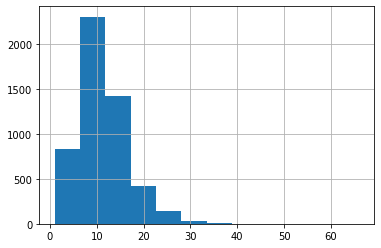

In [16]:
expressions_df['word_count'].hist(bins = 12)

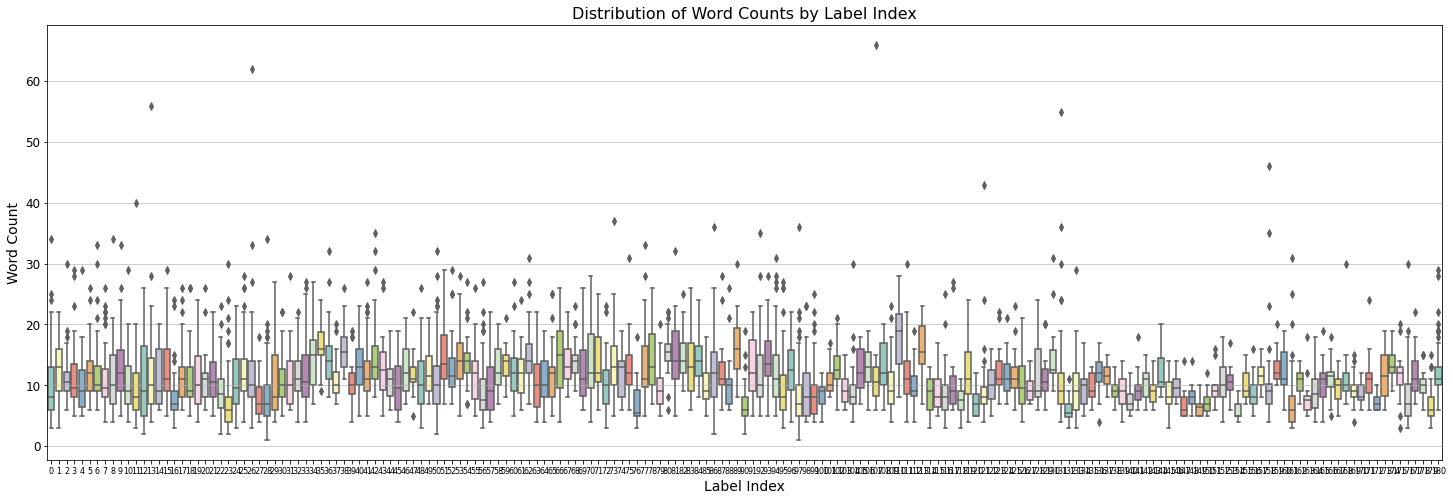

In [17]:
# Setting the size of the figure
plt.figure(figsize=(25,8))

#Plotting the Box Plot
sns.boxplot(x = "label_idx", 
            y = "word_count",
            data =expressions_df,
            palette="Set3")

# Add a title and axis labels
plt.title("Distribution of Word Counts by Label Index", fontsize=16)
plt.xlabel("Label Index", fontsize=14)
plt.ylabel("Word Count", fontsize=14)

# Adding grid lines and adjusting the tick font size to accomodate such a big graph
plt.grid(axis='y', alpha=0.75)
plt.xticks(fontsize=8)
plt.yticks(fontsize=12)

# Show the plot
plt.show()



The displayed boxplot indicates the presence of several outliers in the dataset. It is noteworthy that certain questions contain both really short and extremely long answers.

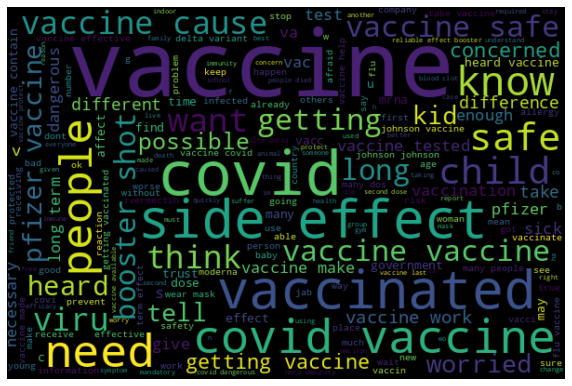

In [18]:
#Doing a word cloud
all_words_lem = ' '.join([word for word in lemmatized_tokens])

wordcloud = WordCloud(width=600,
                     height=400,
                     random_state=2,
                     max_font_size=100).generate(all_words_lem)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

Word clouds are a great way to visualize which words appear most in my text and we will double check that below in the frequent words bar chart

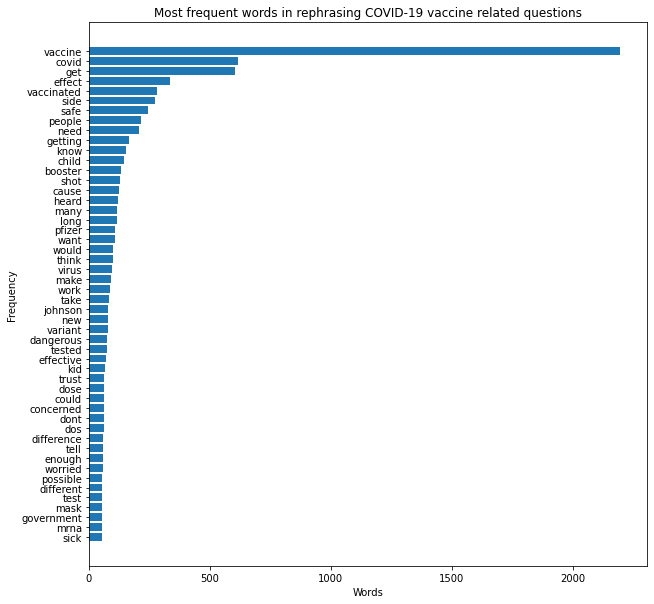

In [19]:
#Doing a frequency distribution using the inbuilt python function
freq_dist = nltk.FreqDist(filtered_tokens_clean)

# Sorting the frequency distribution by frequency in descending order
sorted_freq_dist = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Extract the top 50 words with the highest frequencies
top_words = sorted_freq_dist[:50]

# Creating a bar graph of the top word frequencies
plt.figure(figsize=(10,10))

plt.barh(range(len(top_words)), [word[1] for word in reversed(top_words)], align='center')
plt.yticks(range(len(top_words)), [word[0] for word in reversed(top_words)])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most frequent words in rephrasing COVID-19 vaccine related questions')
plt.show()

Since this dataset tackles opinions about the vaccine, we can see that vaccine, vaccinated and vaccines are on the top of the list followed by covid and covid-19.

What is interesting is that the words "effects" and "sides" are among the top most used words in answers hence showcasing that people were concerned with the side effects of the vaccine and thus, mentioned it a lot while rephrasing the questions.

We can see the words "dangerous", "worried", "concerened" and "sick" among the 50 most used words, leading us to think that people might have been scared of getting it.



---



We further explore the answers which are of the longest and shortest lengths

In [20]:
#shortest answers
expressions_df.sort_values(by='word_count').head(10)

,sentence,label,label_idx,word_count
5125,covid-19,what is covid?,97,1
4195,whats?,What is in the vaccine?,28,1
5068,erectile disfunction?,Will the vaccine make me sterile or infertile?,86,2
613,for kids,Can children get the vaccine?,90,2
3540,its safe?,The COVID vaccine is not safe,23,2
1423,I'm prefnant,Does the vaccine impact pregnancy?,50,2
2408,its necessary?,I don't think the vaccine is necessary,12,2
5161,emergency covid?,what is covid?,97,2
3470,secondary effects,Side effects and adverse reactions worry me,22,2
172,covid-19 is dangerous?,COVID-19 is not as dangerous as they say,0,3


In [21]:
#longest answers
expressions_df.sort_values(by='word_count', ascending=False).head(10)

,sentence,label,label_idx,word_count
2929,Make sure you understand and comply with all t...,Is it okay for me to travel internationally if...,107,66
3750,The fear that a vaccine will somehow change yo...,They will put a chip/microchip to manipulate me,26,62
2448,These companies could be out to make a profit ...,I don't trust the companies producing the vacc...,13,56
4687,"For many, a nationwide return to normalcy from...",Why are COVID-19 vaccination rates slowing in ...,131,55
3159,The standard FDA approval process is like a si...,Is the vaccine FDA approved?,158,46
3493,"after what corona virus did to the world, i ca...",Tell me about the vaccine,121,43
2055,"The COVID-19 vaccine will be free for all, reg...",How much will I have to pay for the vaccine,11,40
4089,No vaccine is 100% effective so it is still th...,What if I still get infected even after receiv...,73,37
4683,As the US may miss a vaccination goal set by P...,Why are COVID-19 vaccination rates slowing in ...,131,36
5067,I was told they dont know what kind of effect ...,Will the vaccine make me sterile or infertile?,86,36


Based on the above, it can be seen that the shortest answers were not quite as relevant as longer ones and did not present as much detail and insight as long answers

### Collocations

Collocations are phrases or expressions containing multiple words that are highly likely to  co-occur.

Collocations are important in text analysis because they can provide insights into the meaning and context of a text. 

Analyzing collocations helps in identifying the key themes and topics dominating my text, as well as the specific language and phrasing that is commonly used in relation to said themes and topics.


In [22]:
#bigrams are a sequence of two adjacent words in a text corpus
bigram_measures = nltk.collocations.BigramAssocMeasures()

#trigrams are a sequence of three adjacent words in a text corpus
trigram_measures = nltk.collocations.TrigramAssocMeasures()

finder = BigramCollocationFinder.from_words(filtered_tokens_clean)

#Using PMI scores to quantify and rank the BiGrams
finder.nbest(bigram_measures.pmi, 50)
scoring_metric = BigramAssocMeasures().raw_freq
top_bigrams = finder.nbest(scoring_metric, 10)

#Print the most frequent bigrams
for bigram in top_bigrams:
    print(bigram)


('side', 'effect')
('covid', 'vaccine')
('get', 'vaccine')
('get', 'vaccinated')
('vaccine', 'cause')
('booster', 'shot')
('vaccine', 'safe')
('pfizer', 'vaccine')
('vaccine', 'work')
('get', 'covid')


From the above bigram collocations, we can see that the main topic of the answers were regarding the side effects of the vaccine and actually getting the vaccine. Booster shots and safety of the vaccines were also quite discussed in the dataset.

The fact that the words "vaccine" and "safe" follow each other a lot can either indicate that people feel safe having the vaccine or that people are questioning the safety of the vaccine, we will double check that in the concordances section below

### Word associations

Word associations are used in text analysis to identify the relationships between words in a text corpus. They help to uncover patterns and connections between words that may not be immediately apparent, and can be used to gain insights into the themes and topics present in the text. 

Word associations can be used to identify related words and phrases, such as synonyms or antonyms, as well as more complex relationships, such as collocations and semantic relationships.

In [23]:
#Initiate a BigramAssocMeasures() object
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_tokens_clean)

finder.nbest(bigram_measures.likelihood_ratio, 20)

[('side', 'effect'),
 ('booster', 'shot'),
 ('get', 'vaccinated'),
 ('wear', 'mask'),
 ('johnson', 'johnson'),
 ('delta', 'variant'),
 ('vaccine', 'cause'),
 ('herd', 'immunity'),
 ('many', 'dos'),
 ('blood', 'clot'),
 ('would', 'like'),
 ('long', 'term'),
 ('south', 'african'),
 ('many', 'people'),
 ('covid', '19'),
 ('priority', 'group'),
 ('covid', 'vaccine'),
 ('lymph', 'node'),
 ('pfizer', 'vaccine'),
 ('convalescent', 'plasma')]

I also used words associated with the word "vaccine" since it is the predominent word in the dataset.

I have decided to use trigrams to have a deeper look into the answers

In [24]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()

# Ngrams with 'vaccine' as a member
vaccine_filter = lambda *w: 'vaccine' not in w

finder = TrigramCollocationFinder.from_words(filtered_tokens_clean)

# only trigrams that appear 3+ times
finder.apply_freq_filter(3)
# only trigrams that contain 'vaccine'
finder.apply_ngram_filter(vaccine_filter)

# return the 10 n-grams with the highest PMI
finder.nbest(trigram_measures.likelihood_ratio, 10)


[('side', 'effect', 'vaccine'),
 ('vaccine', 'side', 'effect'),
 ('covid', 'vaccine', 'cause'),
 ('pfizer', 'vaccine', 'cause'),
 ('johnson', 'johnson', 'vaccine'),
 ('vaccine', 'cause', 'autism'),
 ('heard', 'vaccine', 'cause'),
 ('vaccine', 'cause', 'brain'),
 ('johnson', 'vaccine', 'cause'),
 ('vaccine', 'cause', 'harm')]

These word associations give a very deep understanding of the theme of the answers which are mostly regarding the side effects of the vaccine as well the doses, safety, types of vaccines, whether is causes sickness or not...

From these word associations, it can be seen that people are generally not very covinced when it comes to the vaccine



### Concordances

We can further look up the locations at which a given word occurs in the news articles using a concordance analysis.


In [25]:
from nltk.text import Text  
textlist = Text(tokenized_words)
print(textlist)
textlist.concordance("vaccine", width=100, lines=10)

<Text: 0 do booster shots have side effects worsen...>
Displaying 10 of 1900 matches:
shots have side effects worsen than ... 1 the vaccine has side effects ? 2 booster vaccine leaves w
.. 1 the vaccine has side effects ? 2 booster vaccine leaves worse side effects than ... 3 are rein
ffects t ... 7 because the second dose of the vaccine causes ... 8 are the side effects of the boos
 ... 13 what is the risk of getting a booster vaccine ? 14 the reinforcement is softer than the dos
fter my second shot ... 16 the booster of the vaccine is worse than the f ... 17 the second dose of
orse than the f ... 17 the second dose of the vaccine has worse side ... 18 you should stay ok if y
rules to be ... 36 do i really need the covid vaccine or will ... 37 are regular safety measures en
, why should i get ... 55 i do not know which vaccine is more recommende ... 56 how many vaccinatio
dren t ... 62 what side effects can the covid vaccine bring ... 63 is there a specific vaccine that
ovid vaccine b

From the above concordances, we can see that mostly, the word vaccine has been used in a negative way such as people getting afraid to get sick, causing infertility, vaccine containing fetal cells as well as many others.

## Trust Dataset

Now we are going to explore the Intent Expressions Dataset by looking at all of the word counts, collocations, word associations and concordances


### Word Count and Frequencies

First, I'm going to look at the word count and frquencies in order to try to locate a trend in the data just like we did for the Intent Expressions Dataset using the function **word_count** that we have already defined before

In [26]:
#Applying the word_count function
trust_df['word_count'] = trust_df['text'].apply(word_count)

# Descriptive analysis of the word_count data
trust_df['word_count'].describe()

count    1815.00000
mean        7.57686
std         4.50389
min         1.00000
25%         5.00000
50%         7.00000
75%         9.00000
max        42.00000
Name: word_count, dtype: float64

The inputs in the trust dataset seem to be shorter than the ones in Intent expressions dataset

<Axes: >

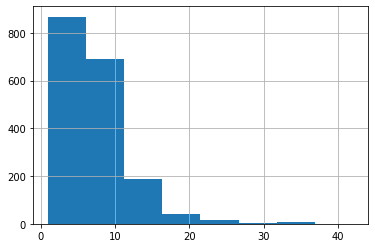

In [27]:
trust_df['word_count'].hist(bins = 8)

The majority of answers seem to have between 1 and 10 words

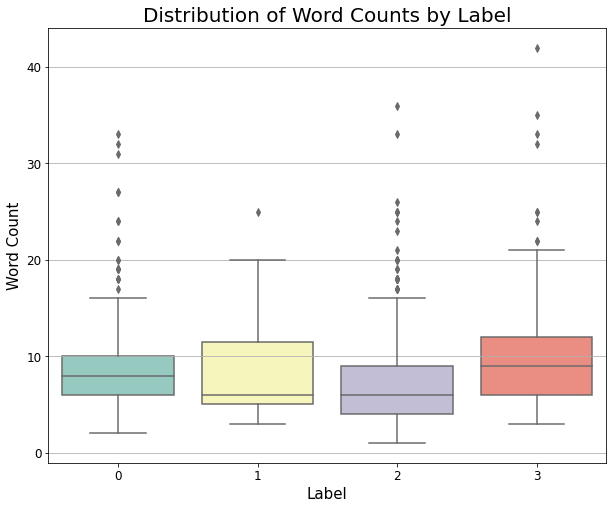

In [28]:
# Setting the size of the figure
plt.figure(figsize=(10,8))

#Plotting the Box Plot
sns.boxplot(x = "label", 
            y = "word_count",
            data = trust_df,
            palette="Set3")

# Add a title and axis labels
plt.title("Distribution of Word Counts by Label", fontsize=20)
plt.xlabel("Label", fontsize=15)
plt.ylabel("Word Count", fontsize=15)

# Adding grid lines and adjusting the tick font size to accomodate such a big graph
plt.grid(axis='y', alpha= 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()



From the above graph it can be seen that people with high trust in the vaccine have a bigger word count in their answers compared to people with low trust. The answers that were the shortest came from individuals who are neutral about the vaccine, which is expected since they wouldn't have a lot to say if they are neutral

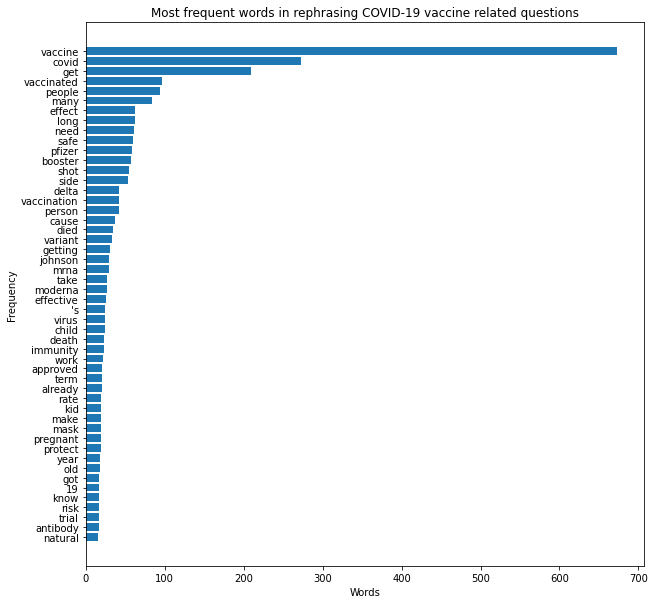

In [29]:
#Doing a frequency distribution using the inbuilt python function
freq_dist = nltk.FreqDist(filtered_tokens_clean_t)

# Sorting the frequency distribution by frequency in descending order
sorted_freq_dist = sorted(freq_dist.items(), key=lambda x: x[1], reverse=True)

# Extract the top 50 words with the highest frequencies
top_words = sorted_freq_dist[:50]

# Creating a bar graph of the top word frequencies
plt.figure(figsize=(10,10))

plt.barh(range(len(top_words)), [word[1] for word in reversed(top_words)], align='center')
plt.yticks(range(len(top_words)), [word[0] for word in reversed(top_words)])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most frequent words in rephrasing COVID-19 vaccine related questions')
plt.show()

The word distribution in the Trust Dataset is what you would normally expect from people's responses about vaccines. Some of the top words that people have used in their responses include "pfizer", "moderna", "johnson", which indicates that the brand of the vaccine seems to be influencing their responses.

The words "died", "death" and "risk" are ones of the frequently occuring words which indicate some negative feelings. 

### Collocations

Same as we did before, we are going to look at collocations for deeper insights on the data

In [30]:
#bigrams are a sequence of two adjacent words in a text corpus
bigram_measures = nltk.collocations.BigramAssocMeasures()

finder = BigramCollocationFinder.from_words(filtered_tokens_clean_t)

#Using PMI scores to quantify and rank the BiGrams
finder.nbest(bigram_measures.pmi, 50)
scoring_metric = BigramAssocMeasures().raw_freq
top_bigrams = finder.nbest(scoring_metric, 10)

#Print the most frequent bigrams
for bigram in top_bigrams:
    print(bigram)


('covid', 'vaccine')
('get', 'vaccine')
('side', 'effect')
('many', 'people')
('get', 'covid')
('vaccine', 'safe')
('get', 'vaccinated')
('vaccine', 'cause')
('people', 'died')
('pfizer', 'vaccine')


From the collocations above, we can see that just like in the Intent Expressions dataset, the words side and effect are from the most seen collocations.

The words "vaccine" and "safe" are seen together which can mean one of two things
1. People think getting the vaccine is safe
2. People are speculating whether it is safe or not

Another interesting thing is "people" and "died" are two words that appear together. Also leading towards the untrusting side of opinions

### Word Associations

We will next be looking at word associations

In [31]:
bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_tokens_clean_t)

finder.nbest(bigram_measures.likelihood_ratio, 20)

[('side', 'effect'),
 ('long', 'term'),
 ('year', 'old'),
 ('many', 'people'),
 ('delta', 'variant'),
 ('people', 'died'),
 ('spike', 'protein'),
 ('booster', 'shot'),
 ('natural', 'immunity'),
 ('johnson', 'johnson'),
 ('vaccine', 'vaccine'),
 ('vaccine', 'cause'),
 ('fetal', 'cell'),
 ('pregnant', 'woman'),
 ('get', 'vaccinated'),
 ('need', 'booster'),
 ('covid', '19'),
 ('adverse', 'reaction'),
 ('blood', 'clot'),
 ('gene', 'therapy')]

From the above, it can be noticed that word associations are tending towards negative words such as "fetal", "died", "blood" and "clot" leading to the assumption that untrusting thoughts are dominating in this dataset

### Concordances

For the concordances I will be using the tokenized words dataframe before doing further data cleaning on it so that the sentences will make sence before removing stopwords and lemmatization

In [32]:
#I would like to look at how the word "trust" is coming in the sentence
from nltk.text import Text  
textlist = Text(tokenized_words_t)
print(textlist)
textlist.concordance("trust", width=100, lines=10)

<Text: 0 if symptomatic patient got the vaccine will...>
Displaying 7 of 7 matches:
 getting the pfizer , moder ... 2 why should i trust a pharmaceutical company wh ... 3 what are ant
nough about long term effects 157 why should i trust jewish vaccines ? 158 what is the rate of seve
not have full approval from t ... 325 i do n't trust the vaccine . they made it too qu ... 326 how 
any to cal ... 399 vaccines hurt 400 how can i trust the millions that didnt look i ... 401 will th
t answer my question . goodbye . 459 how can i trust you ? 460 google and alexa are smarter than yo
ion whilst i ... 498 corona symptoms 499 can i trust the gouvernment ? 500 hi ! i 'm concerned that
cine sites 1371 wie viele person ? 1372 do you trust dr. person ? 1373 asf 1374 do you know alexa ?


The above shows that people are questioning whether or not they should trust the vaccine instead of stating that they do trust it; which is a question that was pending after collocations were done

In [33]:
#I would like to look at how the word "died" is coming in the sentence
from nltk.text import Text  
textlist = Text(tokenized_words_t)
print(textlist)
textlist.concordance('dies')
textlist.concordance("died", width=100, lines=10)

<Text: 0 if symptomatic patient got the vaccine will...>
no matches
Displaying 10 of 35 matches:
atient got the vaccine will he ... 1 has anyone died from getting the pfizer , moder ... 2 why shoul
y deaths from vaccine 46 yes or no , has anyone died from taking the vac ... 47 can covid vaccines c
 vaccine contain nano particles ? 51 had anyone died from the vaccines ? 52 why have n't all the vac
nes been approved yet ? 53 how many people have died from the vacine ? 54 what side effects 55 have 
he vacine ? 54 what side effects 55 have people died from the vax ? 56 can the vaccine cause a cytok
 dizziness ? 96 how many vaccinated people have died due to covid 97 what about side effects 98 why 
 100 the vaccines are too new 101 i heard a kid died recently from getting the v ... 102 will the va
r from heart issue ... 122 how many people have died from the pfizer vacc ... 123 how many people ha
eloped too quickly 152 i have heard people have died of the vaccine , ... 153 what makes these 

Dying from the vaccine is another fear that people have according to the above code. A lot of answers have people speculating whether or not the vaccine might cause death

## Sentiment Analysis

In this paragraph, we will perform sentiment analysis which is a text analydid technique that uses Natural Language Processing and Machine Learning algorithms to extract subjective information from my texts such as sentiments or tone and classify it as positive, negative or neutral

Sentiment analysis is done to data that is pre processed, meaning I have already removed stop words, stemmed the words and removed punctuations.

Once my text has been preprocessed and analyzed, I will start classifying sentiments of the text using the code below.

Sentiment analysis has a wide range of applications, including market research, brand management, social media monitoring, and customer feedback analysis. It can help businesses and organizations gain insights into the opinions and attitudes of their customers and stakeholders, and make data-driven decisions based on this information.

In this case, sentiment analysis is going to be used for medical researching purposes in order to know how people feel about the vaccine and thus, how likely they are to have it.

First, I am going to prepare the data in a different way that I did before which will suite more the sentiment analysis part 

Cleaning the Expressions dataset

In [34]:
#Preparing the data for sentiment analysis
#Lowercase
expressions_df['sentence'] = expressions_df['sentence'].astype(str).str.lower()
regexp = RegexpTokenizer('\w+')

#Tokenizing
expressions_df['sentence_token']=expressions_df['sentence'].apply(regexp.tokenize)
expressions_df['sentence_token'] =expressions_df['sentence_token'].apply(lambda x: [item for item in x if item not in stop_words])

#Removing strings smaller than 2 letters and saving them in a new column
expressions_df['sentence_string'] =expressions_df['sentence_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
all_words = ' '.join([word for word in expressions_df['sentence_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

#Getting the most frequent words
fdist = FreqDist(tokenized_words)
expressions_df['sentence_string_fdist'] = expressions_df['sentence_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

#Lemmatizing
wordnet_lem = WordNetLemmatizer()
expressions_df['sentence_string_lem'] = expressions_df['sentence_string_fdist'].apply(wordnet_lem.lemmatize)

Cleaning the Trust Dataset

In [35]:
#Preparing the data for sentiment analysis
trust_df['text'] = trust_df['text'].astype(str).str.lower()
regexp = RegexpTokenizer('\w+')

#Tokenizing
trust_df['text_token'] = trust_df['text'].apply(regexp.tokenize)
trust_df['text_token'] =trust_df['text_token'].apply(lambda x: [item for item in x if item not in stop_words])

#Removing strings smaller than 2 letters and saving them in a new column
trust_df['text_string'] =trust_df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
all_words = ' '.join([word for word in trust_df['text_string']])
tokenized_words = nltk.tokenize.word_tokenize(all_words)

#Getting the most frequent words
fdist = FreqDist(tokenized_words)
trust_df['text_string_fdist'] = trust_df['text_token'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))

#Lemmatizing
wordnet_lem = WordNetLemmatizer()
trust_df['text_string_lem'] = trust_df['text_string_fdist'].apply(wordnet_lem.lemmatize)

After preprocessing the data in a way suitable for sentiment analysis, we start with the process



In [36]:
# Create a SentimentIntensityAnalyzer object
analyzer = SentimentIntensityAnalyzer()

# Analyzing the sentiments of the sentences in the Intent Expressions Dataset
expressions_df['polarity'] = expressions_df['sentence_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
expressions_df.tail(3)

#Transform Data
expressions_df = pd.concat(
    [expressions_df.drop(['label_idx', 'word_count', 'polarity'], axis=1), 
     expressions_df['polarity'].apply(pd.Series)], axis=1)


Now we start analyzing the trust Data

In [37]:
# Analyzing the sentiments of the sentences in the Intent Expressions Dataset
trust_df['polarity'] = trust_df['text_string_lem'].apply(lambda x: analyzer.polarity_scores(x))
trust_df.head(5)

#Transform Data
trust_df = pd.concat(
    [trust_df.drop(['label', 'word_count', 'polarity'], axis=1), 
     trust_df['polarity'].apply(pd.Series)], axis=1)

After getting the sentiments, we will divide the sentences to positive, negative and neutral and plot it to better visualize

In [38]:
# Create new variable with sentiment "neutral," "positive" and "negative" for intent expressions dataset
expressions_df['sentiment'] = expressions_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
expressions_df.head(5)


,sentence,label,sentence_token,sentence_string,sentence_string_fdist,sentence_string_lem,neg,neu,pos,compound,sentiment
0,do booster shots have side effects worsen than...,Are booster shot side effects worse than those...,"[booster, shots, side, effects, worsen, second...",booster shots side effects worsen second shot,booster shots side effects worsen second shot,booster shots side effects worsen second shot,0.355,0.645,0.000,-0.5106,negative
1,the vaccine has side effects?,Are booster shot side effects worse than those...,"[vaccine, side, effects]",vaccine side effects,vaccine side effects,vaccine side effects,0.000,1.000,0.000,0.0000,neutral
2,booster vaccine leaves worse side effects than...,Are booster shot side effects worse than those...,"[booster, vaccine, leaves, worse, side, effect...",booster vaccine leaves worse side effects firs...,booster vaccine leaves worse side effects firs...,booster vaccine leaves worse side effects firs...,0.279,0.721,0.000,-0.4767,negative
3,are reinforcements safe?,Are booster shot side effects worse than those...,"[reinforcements, safe]",reinforcements safe,reinforcements safe,reinforcements safe,0.000,0.256,0.744,0.4404,positive
4,because the second dose of the covid-19 vaccin...,Are booster shot side effects worse than those...,"[second, dose, covid, 19, vaccine, higher, sid...",second dose covid vaccine higher side effects,second dose covid vaccine higher side effects,second dose covid vaccine higher side effects,0.000,1.000,0.000,0.0000,neutral


It is very important to get a look at the raw data to actually see how good the sentiment analysis model worked. 

Looking at the above data, in the first sentence, the person was stating that the booster vaccine has worse side effects than the first one, however, after tokenizeing, lemmatizing and removing stop words, it ended up being categorized as a neutral sentence instead of negative, hence making me a little skeptical about the process.

In [39]:
# Create new variable with sentiment "neutral," "positive" and "negative" for trust dataset
trust_df['sentiment'] = trust_df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
trust_df.head(5)

,text,text_token,text_string,text_string_fdist,text_string_lem,neg,neu,pos,compound,sentiment
0,if symptomatic patient got the vaccine will he...,"[symptomatic, patient, got, vaccine, dies]",symptomatic patient got vaccine dies,symptomatic patient got vaccine dies,symptomatic patient got vaccine dies,0.00,1.000,0.000,0.0000,neutral
1,"has anyone died from getting the pfizer, moder...","[anyone, died, getting, pfizer, moderna, johns...",anyone died getting pfizer moderna johnson joh...,anyone died getting pfizer moderna johnson joh...,anyone died getting pfizer moderna johnson joh...,0.34,0.660,0.000,-0.5574,negative
2,why should i trust a pharmaceutical company wh...,"[trust, pharmaceutical, company, manipulate, d...",trust pharmaceutical company manipulate data,trust pharmaceutical company manipulate data,trust pharmaceutical company manipulate data,0.00,0.548,0.452,0.5106,positive
3,what are antisense rna's? could they or dsrna...,"[antisense, rna, could, dsrna, contaminating, ...",antisense rna could dsrna contaminating covid ...,antisense rna could dsrna contaminating covid ...,antisense rna could dsrna contaminating covid ...,0.22,0.780,0.000,-0.4767,negative
4,the vaccines aren't fda approved.,"[vaccines, fda, approved]",vaccines fda approved,vaccines fda approved,vaccines fda approved,0.00,0.417,0.583,0.4215,positive


I would comment the same thing about the second sentiment analysis, a good example is the 4th row where the statement is "the vaccines aren't fda approved" making the statement negative, however, after preprocessing it ended up being categorized as positive

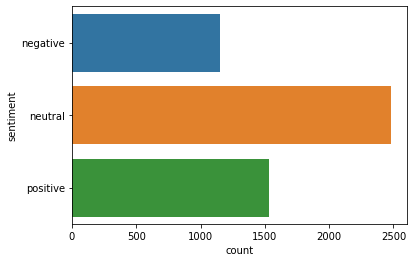

In [40]:
#Plotting the sentiment of Intent Expressions
sns.countplot(y='sentiment', 
             data=expressions_df, 
             );

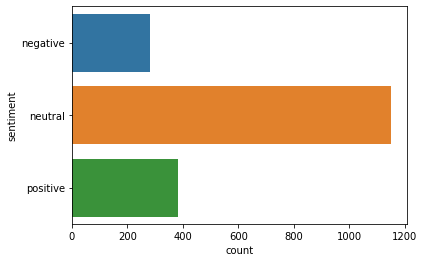

In [41]:
#Plotting the sentiment of trust Expressions
sns.countplot(y='sentiment', 
             data=trust_df,
             order = ['negative' , 'neutral' , 'positive'] 
             );

The graph above shows that most people feel neutral about the vaccine followed by people with positive feelings towards it and the least amount of sentences have a negative feel.

To compare this data with the data from the original trust dataset, it looks contradicting as the other data shows that the least people have a high trust in the vaccine

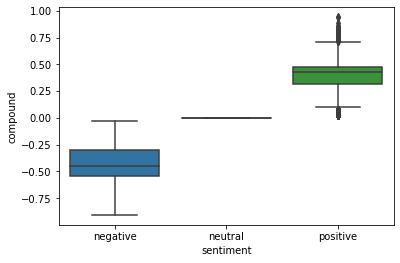

In [42]:
#Box Plot of Intent Analysis
sns.boxplot(y='compound', 
            x='sentiment',
            data=expressions_df);


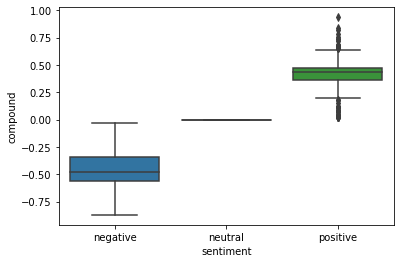

In [43]:
#Box Plot of Trust Analysis
sns.boxplot(y='compound', 
            x='sentiment',
            data=trust_df,
            order = ['negative', 'neutral', 'positive']);


The above boxplots indicate that most negative words had a compound of -0.5 to about -0.3 whereas some of the positive compounds went all the way to 1

## Implications and Conclusion

All troughout this study, the data shows that people mostly feel neutral about the vaccine which can either mean that they lack education about the benefits and side effects of the vaccine or that they are okay with it but are just not too static about it.

From the start of the study until before the sentiment analysis phase, a consistent pattern emerged, indicating that people were likely to either be neutral or distrust the vaccines. This was evident in the language used, with words like "worried," "dangerous," and "sick," among others, frequently appearing and conveying negative emotions associated with vaccines.

Upon examining the concordances of the word "trust" in the trust dataset, it became clear that people were expressing doubts about their confidence in the vaccine. Additionally, the word associations and collocations revealed that words such as "side" and "effect," as well as "blood" and "clot," "adverse" and "reaction," were commonly used together, indicating that people were apprehensive about the potential side effects of the vaccine which suggest that individuals are expressing concerns about the safety of vaccines and the potential risks associated with receiving them.

These findings suggest that there is a significant level of skepticism and uncertainty regarding the safety and effectiveness of vaccines among the general public which matches the hypothesis suggested.

However, when examining the Sentiment Analysis outputs, another theory came about suggesting that individuals tend more towards being trusting of the vaccine, but, looking into the data, it is clear that after lemmatizing and removing stopwords, the words "aren't", "don't", "haven't" and many others were removed, rendering a lot of negative sentence either neutral or positive.

In my opnion, a lot of people are skeptical about the vaccine, hence why less and less people are doing the 3rd and 4th vaccine.

# References



 A Trust-Annotated Corpus of Human-Chatbot Conversations About COVID-19 Vaccines
Roni Friedman, João Sedoc, Shai Gretz, Assaf Toledo, Rose Weeks, Naor Bar-Zeev, Yoav Katz, Noam Slonim
arXiv, 2022

-
 
 ANLP Session 2 Tutorial - Part 1, https://tinyurl.com/ANLPTutorial2Part1



-

Benchmark Data and Evaluation Framework for Intent Discovery Around COVID-19 Vaccine Hesitancy
Shai Gretz, Assaf Toledo, Roni Friedman, Dan Lahav, Rose Weeks, Naor Bar-Zeev, João Sedoc, Pooja Sangha, Yoav Katz, Noam Slonim arXiv, 2022

-

Centers for Disease Control and Prevention. (n.d.). Myths and facts about covid-19 vaccines. Centers for Disease Control and Prevention. Retrieved from https://www.cdc.gov/coronavirus/2019-ncov/vaccines/facts.html 

-

Chat GPT, Chat.openai.com. (n.d). Retrieved March 28, 2023, from https://chat.openai.com/auth/login?next= 

-

Kirenz, J. K. (2022, June 16). Text mining and sentiment 
analysis with NLTK and pandas in Python. Jan Kirenz. Retrieved March 28, 2023, from https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/ 

